# KELOMPOK 4_DATA MININGB - KLASIFIKASI BERDASARKAN TANAH YANG COCOK MENGGUNAKAN METODE NAIVE BAYES DAN RANDOM FOREST
## NURI HIDAYATULOH_210441100100
## KUKUH COKRO WIBOWO_210441100103
## MOCHAMMAD SYAHRUL ABIDIN_210441100001
## MUHAMMAD IQBAL FIRMANSYAH_210441100084

## 1. Mengimport Library yang diperlukan dan Memuat Dataset
### 1.1 Nama dan Penggunaan
#### 1.1.1 Pandas
Pandas digunakan untuk mengolah data. Ini mengandung berbagai fungsi untuk manipulasi dan analisis data.
#### 1.1.2 Numpy
Digunakan untuk mengelola Array
#### 1.1.3 Matplotlib
Matplotlib digunakan untuk visualisasi data. Ini membantu dalam mencari pola dalam dataset.
#### 1.1.4 Seaborn
Seaborn adalah sebuah library untuk membuat grafik statistik di Python. Hal ini dibangun di atas Matplotlib dan terintegrasi erat dengan struktur data pandas. Seaborn membantu dalam eksplorasi dan pemahaman data.
#### 1.1.5 Scikit-learn (Sklearn)
Scikit-learn, juga dikenal sebagai Sklearn, adalah library komprehensif untuk machine learning di Python. Ia menawarkan berbagai alat untuk machine learning dan pemodelan statistik, termasuk klasifikasi, regresi, pengelompokan, dan reduksi dimensionalitas. Sklearn menyediakan antarmuka yang konsisten untuk tugas-tugas ini.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

## 1.2 Memuat dan Memahami Data
#### Ini adalah dataset yang digunakan untuk merekomendasikan tanaman untuk tanah yang cocok. Hal ini akan sangat berguna dalam produksi tanaman (Pertanian) tanpa kehilangan berdasarkan tanah, curah hujan, kelembaban dan komponen kimia lainnya yang ada di dalam tanah.

In [1]:
df = pd.read_csv('/Nuri/SEMESTER 4/DATA MINING/CropRecommendation.csv')

NameError: name 'pd' is not defined

## 1.3 Tentang Dataset yang Kami Pilih
Nitrogen sangat penting karena merupakan komponen utama klorofil, senyawa yang digunakan tumbuhan untuk menggunakan energi sinar matahari untuk menghasilkan gula dari air dan karbon dioksida (yaitu, fotosintesis). Ini juga merupakan komponen utama asam amino, blok pembangun protein. Tanpa protein, tumbuhan akan layu dan mati.

Oleh karena itu, fosfor penting dalam pembelahan sel dan perkembangan jaringan baru. Fosfor juga dikaitkan dengan transformasi energi yang kompleks di dalam tanaman. Menambahkan fosfor ke dalam tanah yang rendah fosfor yang tersedia mendorong pertumbuhan akar dan ketahanan musim dingin, merangsang anakan, dan seringkali mempercepat kematangan.

Kalium adalah nutrisi penting yang diserap tanaman dari tanah, dan dari pupuk. Ini meningkatkan ketahanan terhadap penyakit, membantu batang tumbuh tegak dan kokoh, meningkatkan toleransi kekeringan, dan membantu tanaman melewati musim dingin.

Suhu tanah rata-rata untuk bioaktivitas berkisar antara 50 hingga 75F. Nilai-nilai ini menguntungkan untuk fungsi kehidupan normal biota bumi yang memastikan dekomposisi bahan organik yang tepat, peningkatan mineralisasi nitrogen, penyerapan zat terlarut, dan metabolisme.

Kisaran pH 5,5–6,5 optimal untuk pertumbuhan tanaman karena ketersediaan unsur hara optimal.

Selain penyakit, curah hujan juga dapat menentukan seberapa cepat tanaman akan tumbuh dari biji, termasuk kapan siap panen. Keseimbangan hujan yang baik dan irigasi yang tepat dapat menghasilkan tanaman yang tumbuh lebih cepat, yang dapat mempersingkat waktu perkecambahan dan jarak antara pembibitan dan panen.

In [186]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [187]:
print("Bentuk kerangka data : ",df.shape)
df.isna().sum()

Bentuk kerangka data :  (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [189]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [190]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# 2 Eksplorasi Data Analisis

### 2.1 Distribusi Data

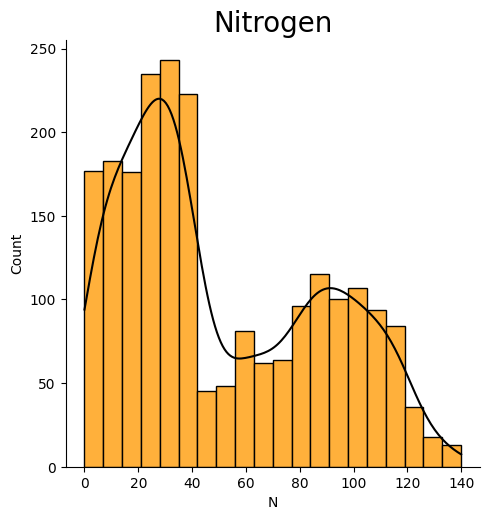

In [9]:
sns.displot(x=df['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Nitrogen",size=20)
plt.show()

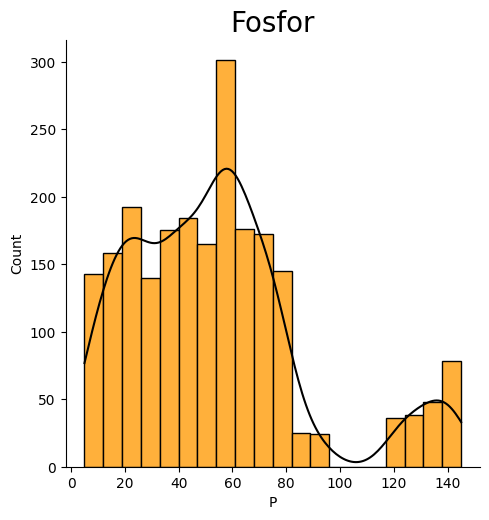

In [191]:
sns.displot(x=df['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Fosfor", size=20)
plt.xticks(range(0,150,20))
plt.show()

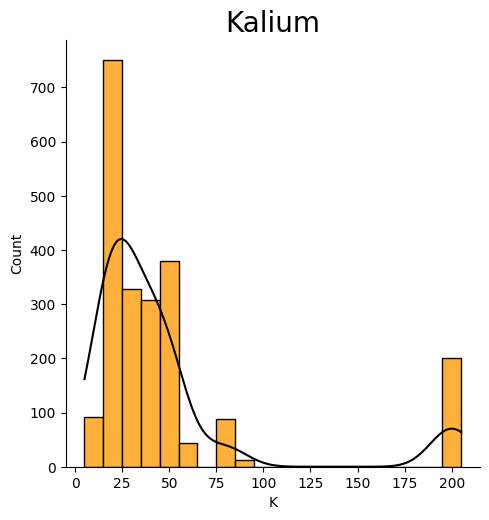

In [192]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Kalium",size=20)
plt.show()

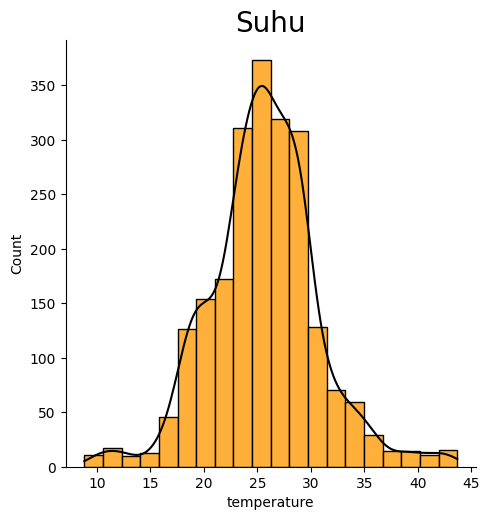

In [193]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Suhu",size=20)
plt.show()

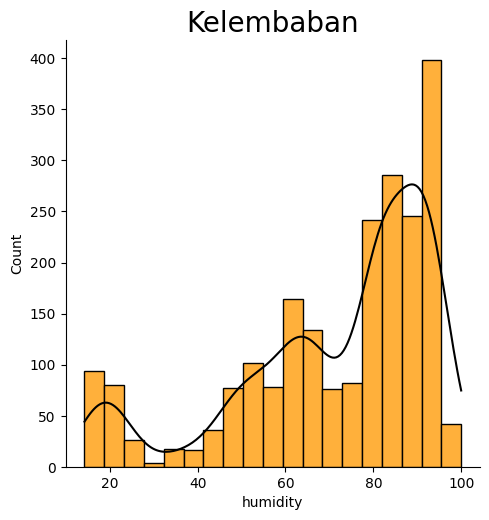

In [194]:
sns.displot(x=df['humidity'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Kelembaban",size=20)
plt.show()

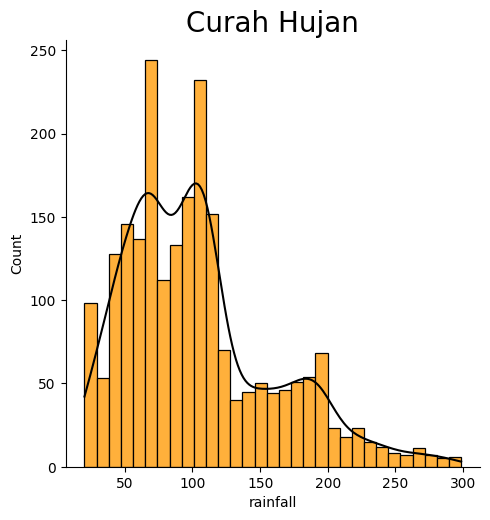

In [195]:
sns.displot(x=df['rainfall'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Curah Hujan",size=20)
plt.show()

## 2.2 Plot kategorikal

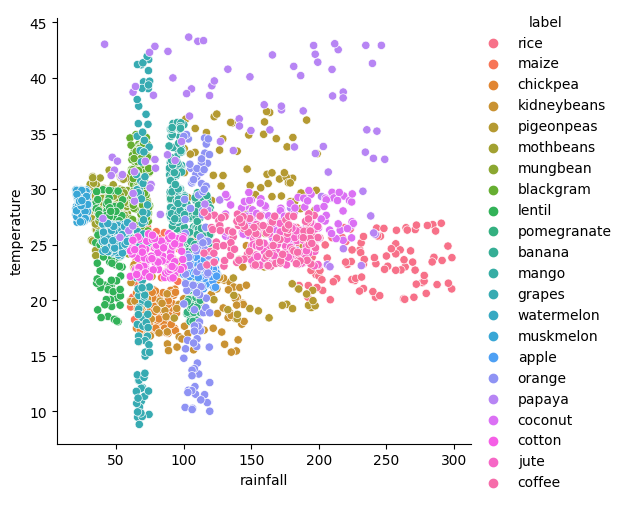

In [196]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

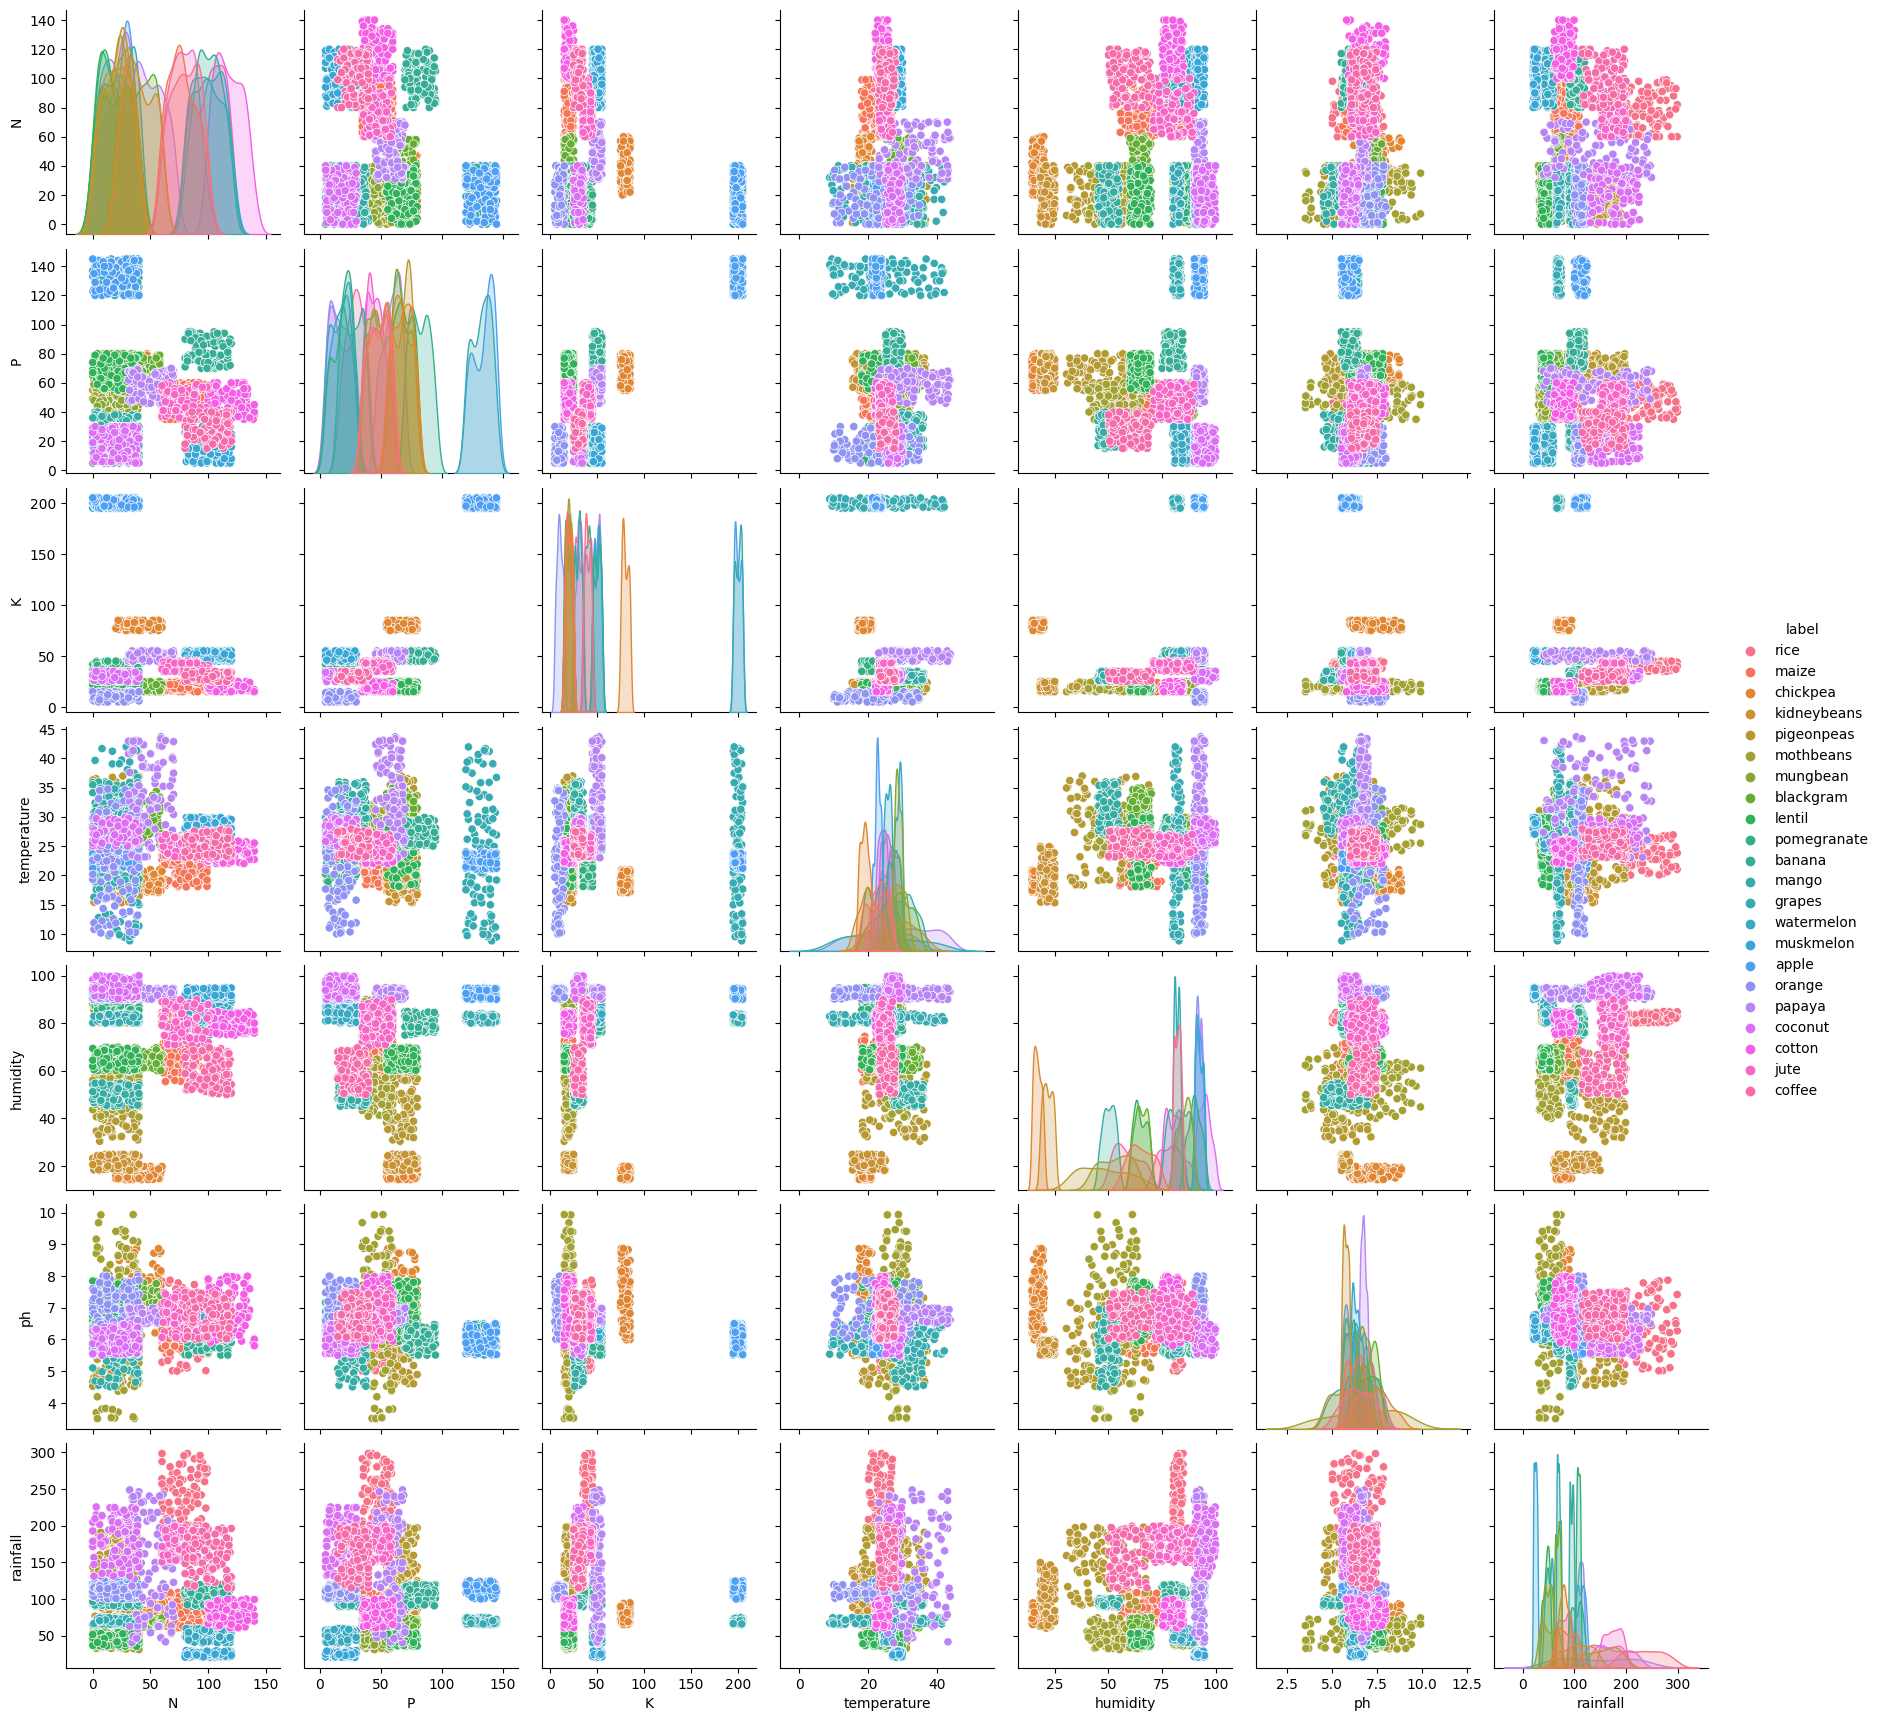

In [197]:
sns.pairplot(data=df,hue='label')
plt.show()

## 2.3 Deteksi Outerlier menggunakan Grafik

#### Mengecek Nilai Unik pada setiap kolom "Label"

In [198]:
crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


#### Memfilter setiap label unik dan menyimpannya dalam daftar df2 untuk memplot plot kotak

In [200]:
df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


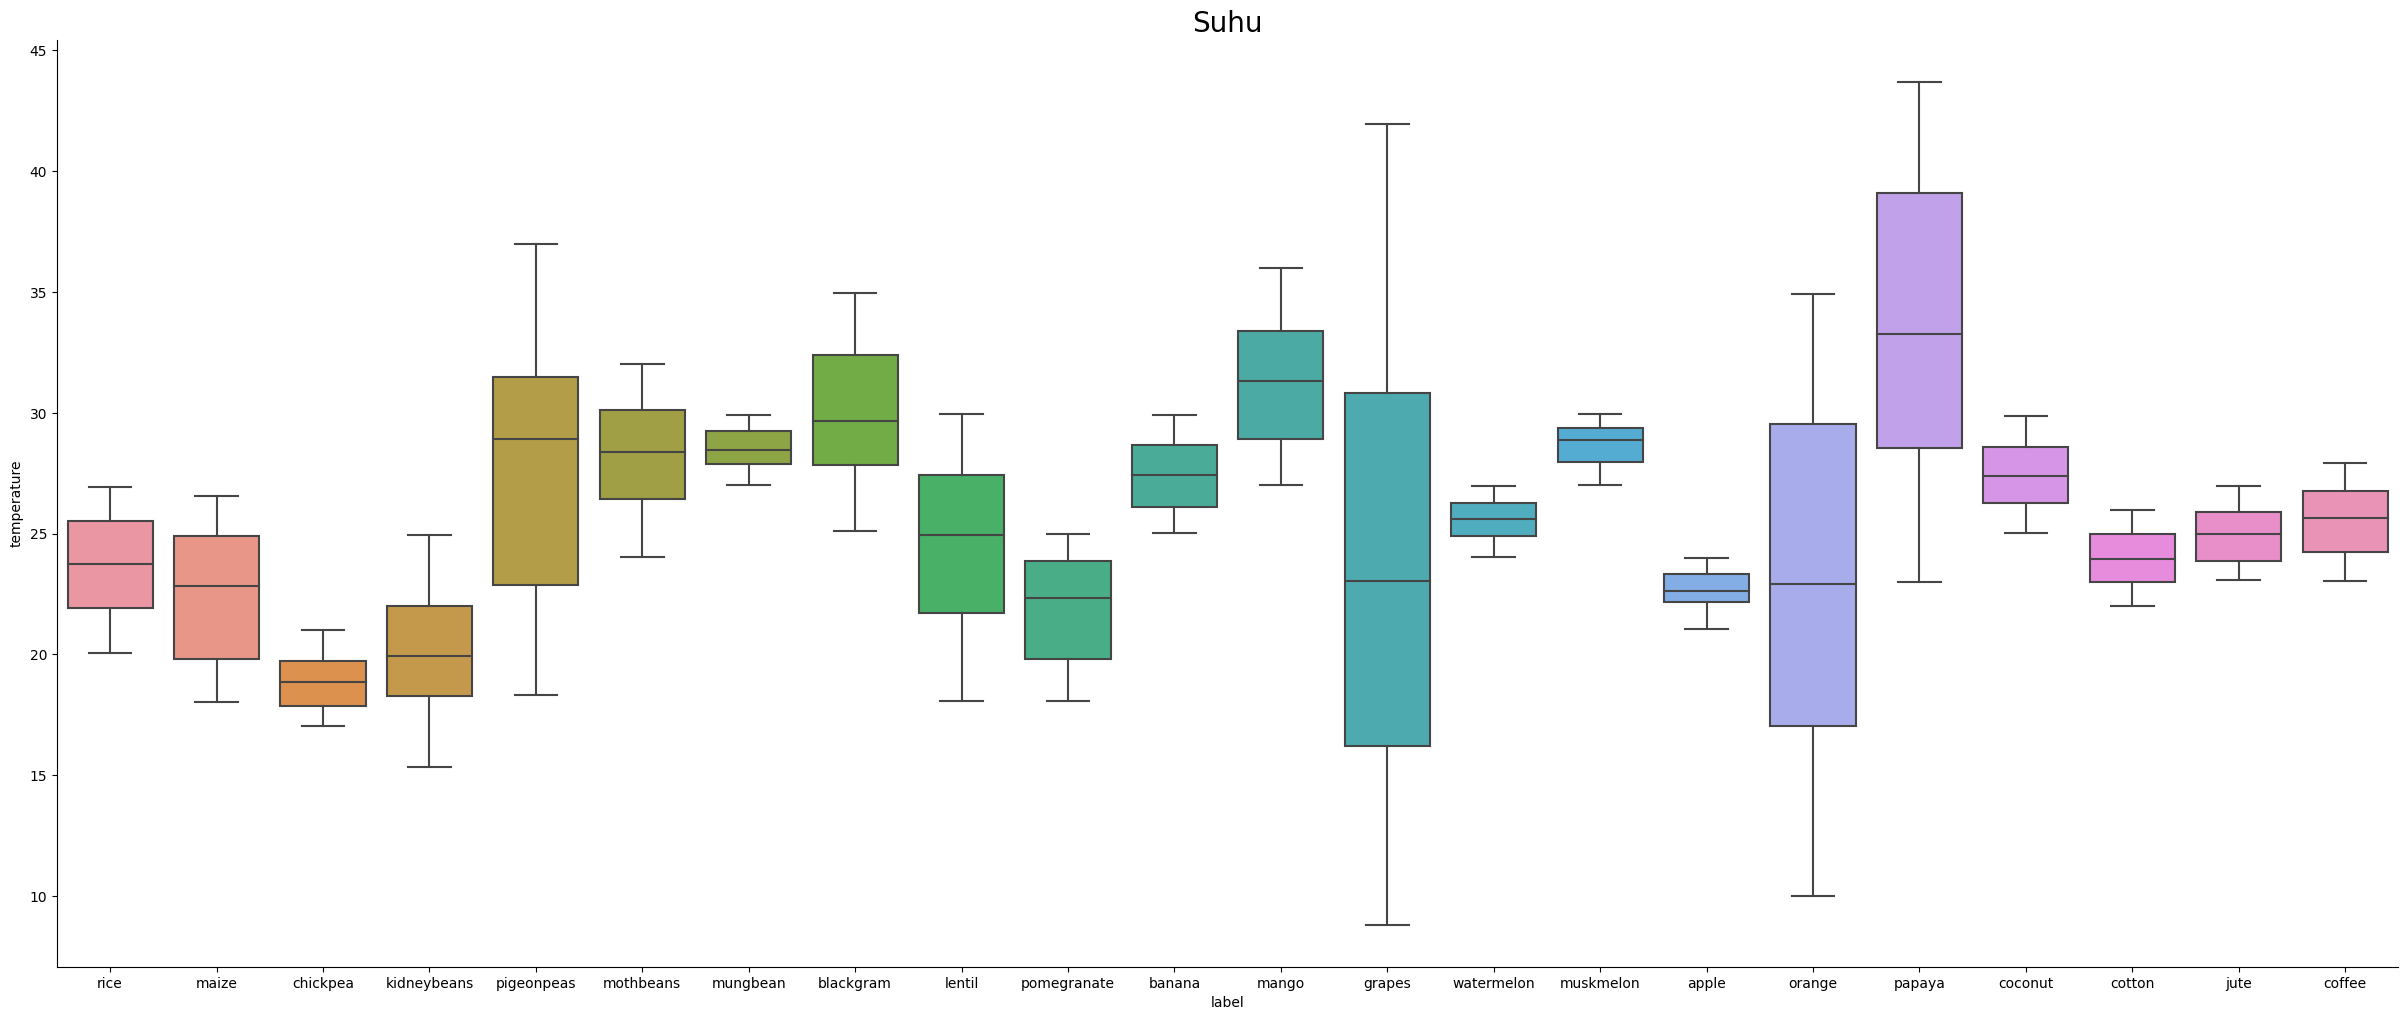

In [203]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.title("Suhu", size=20)
plt.show()

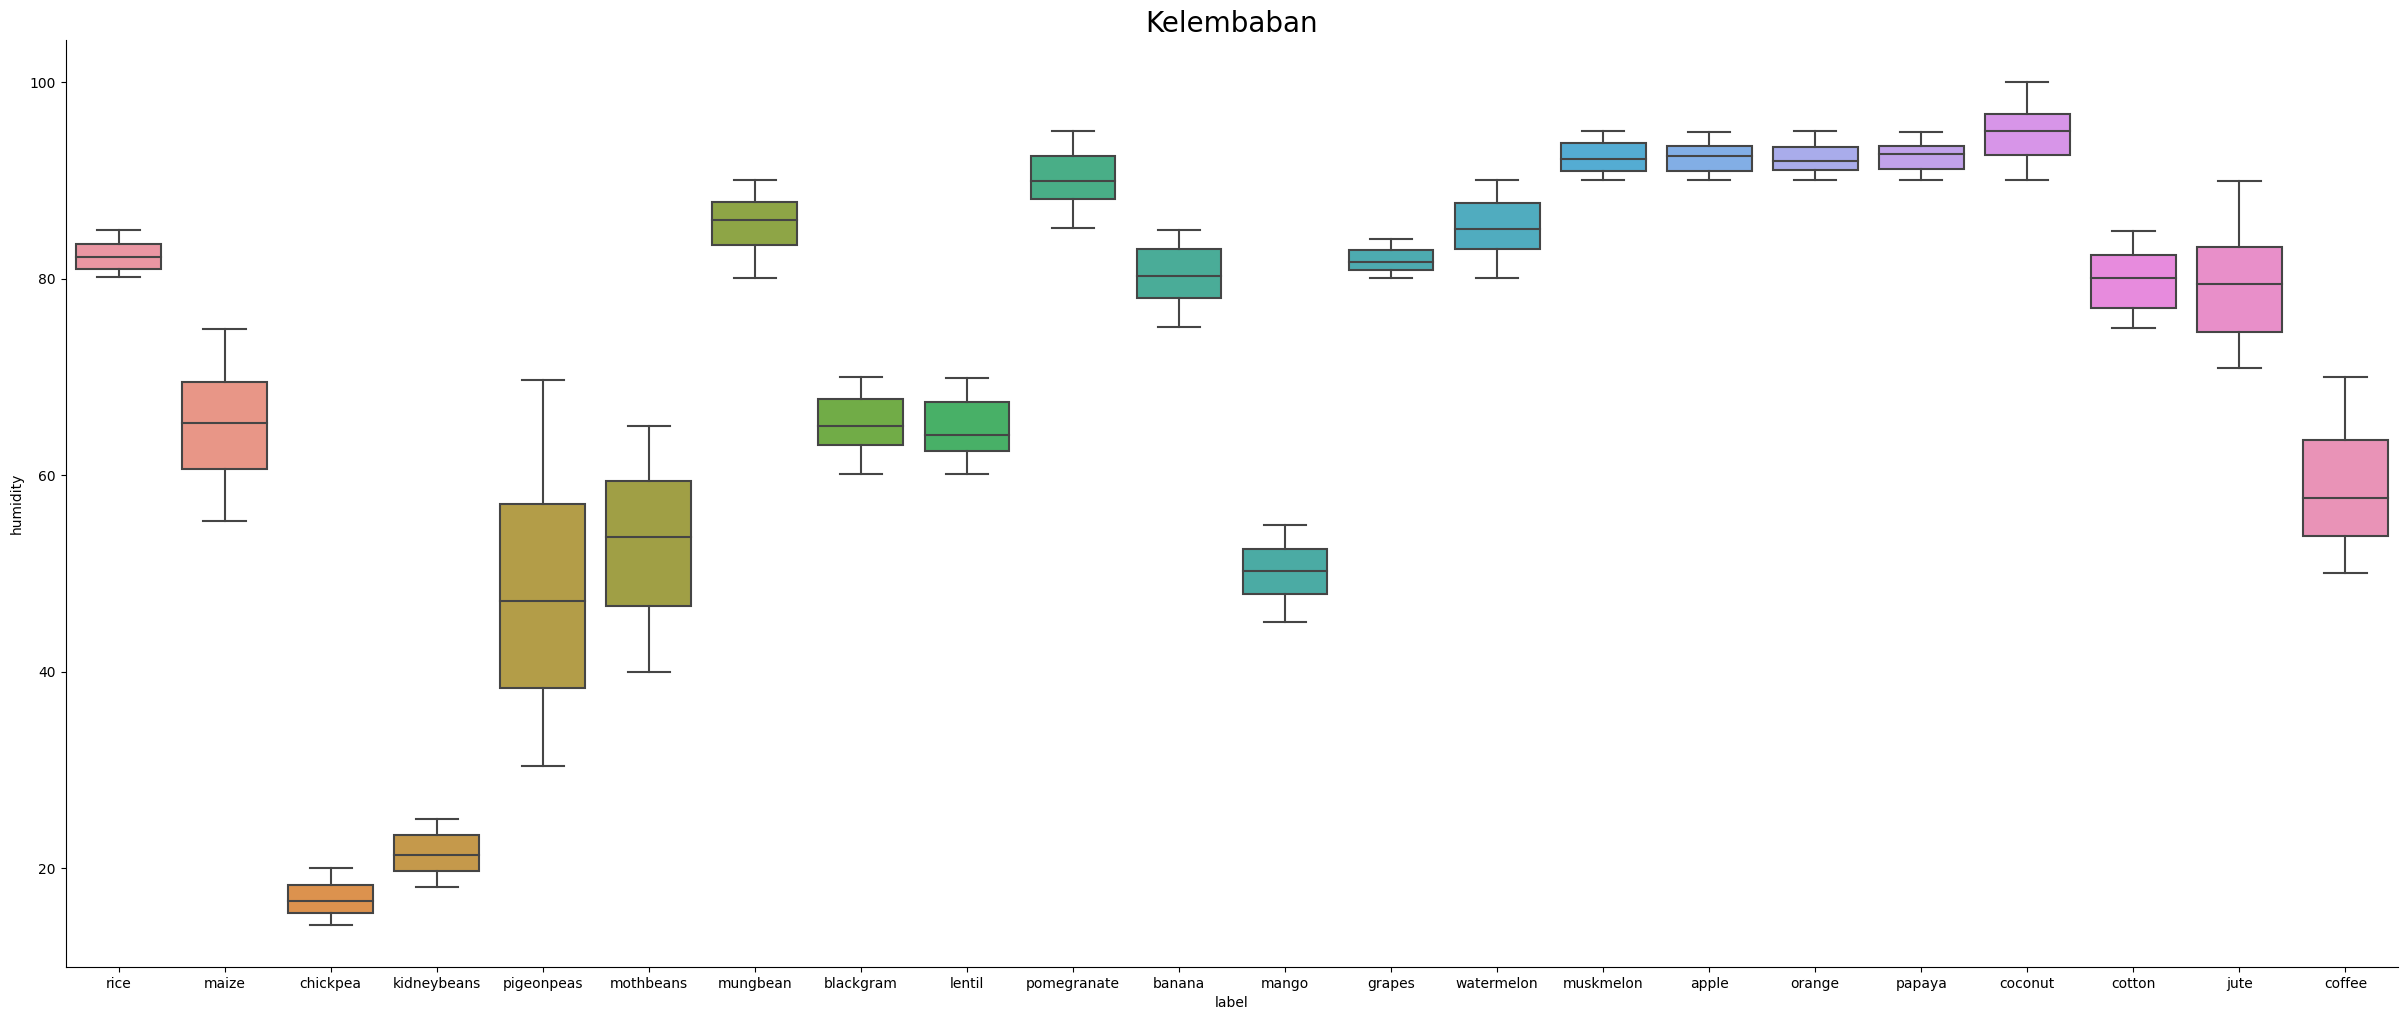

In [204]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
plt.title("Kelembaban", size=20)
plt.show()

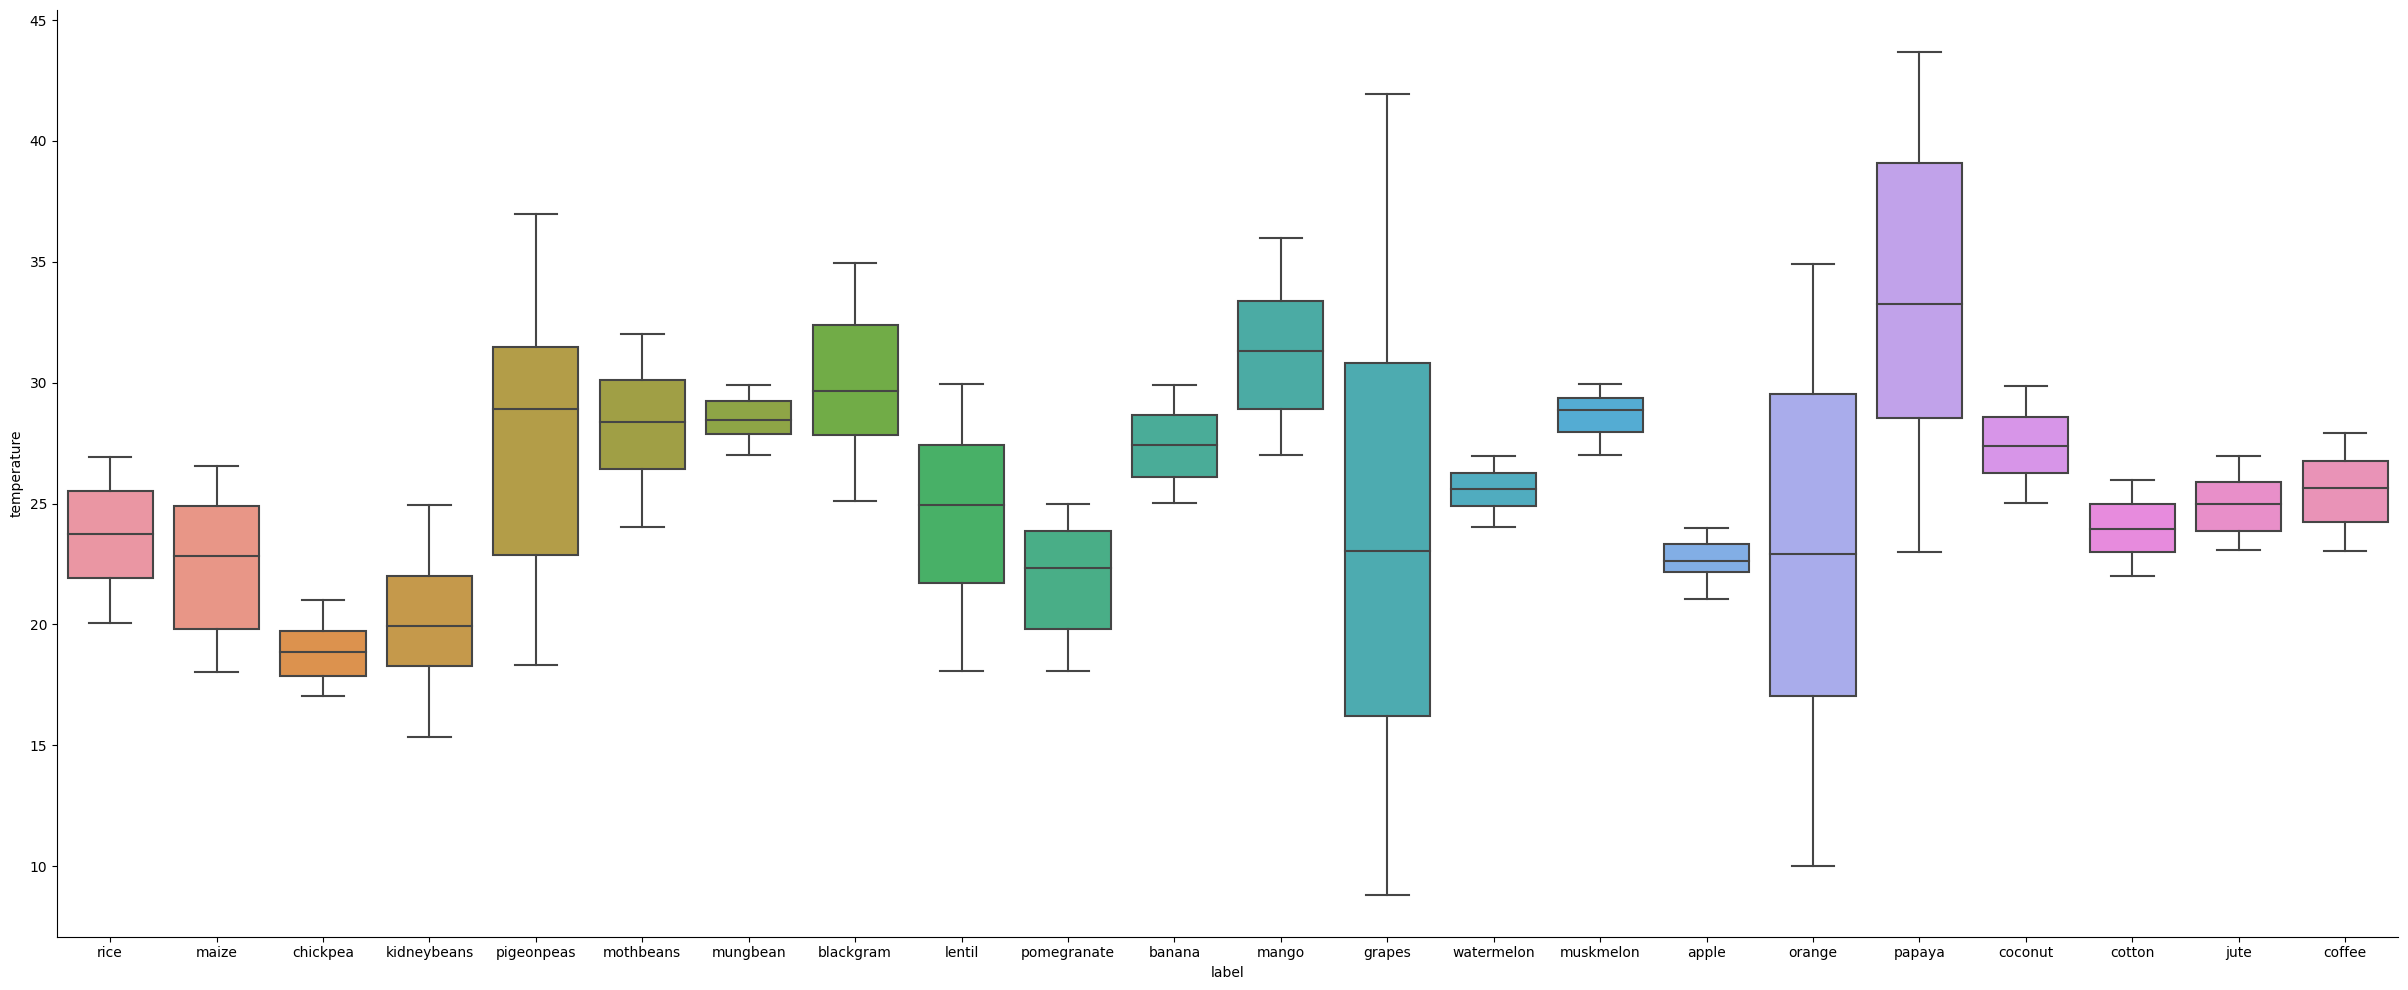

In [21]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.show()


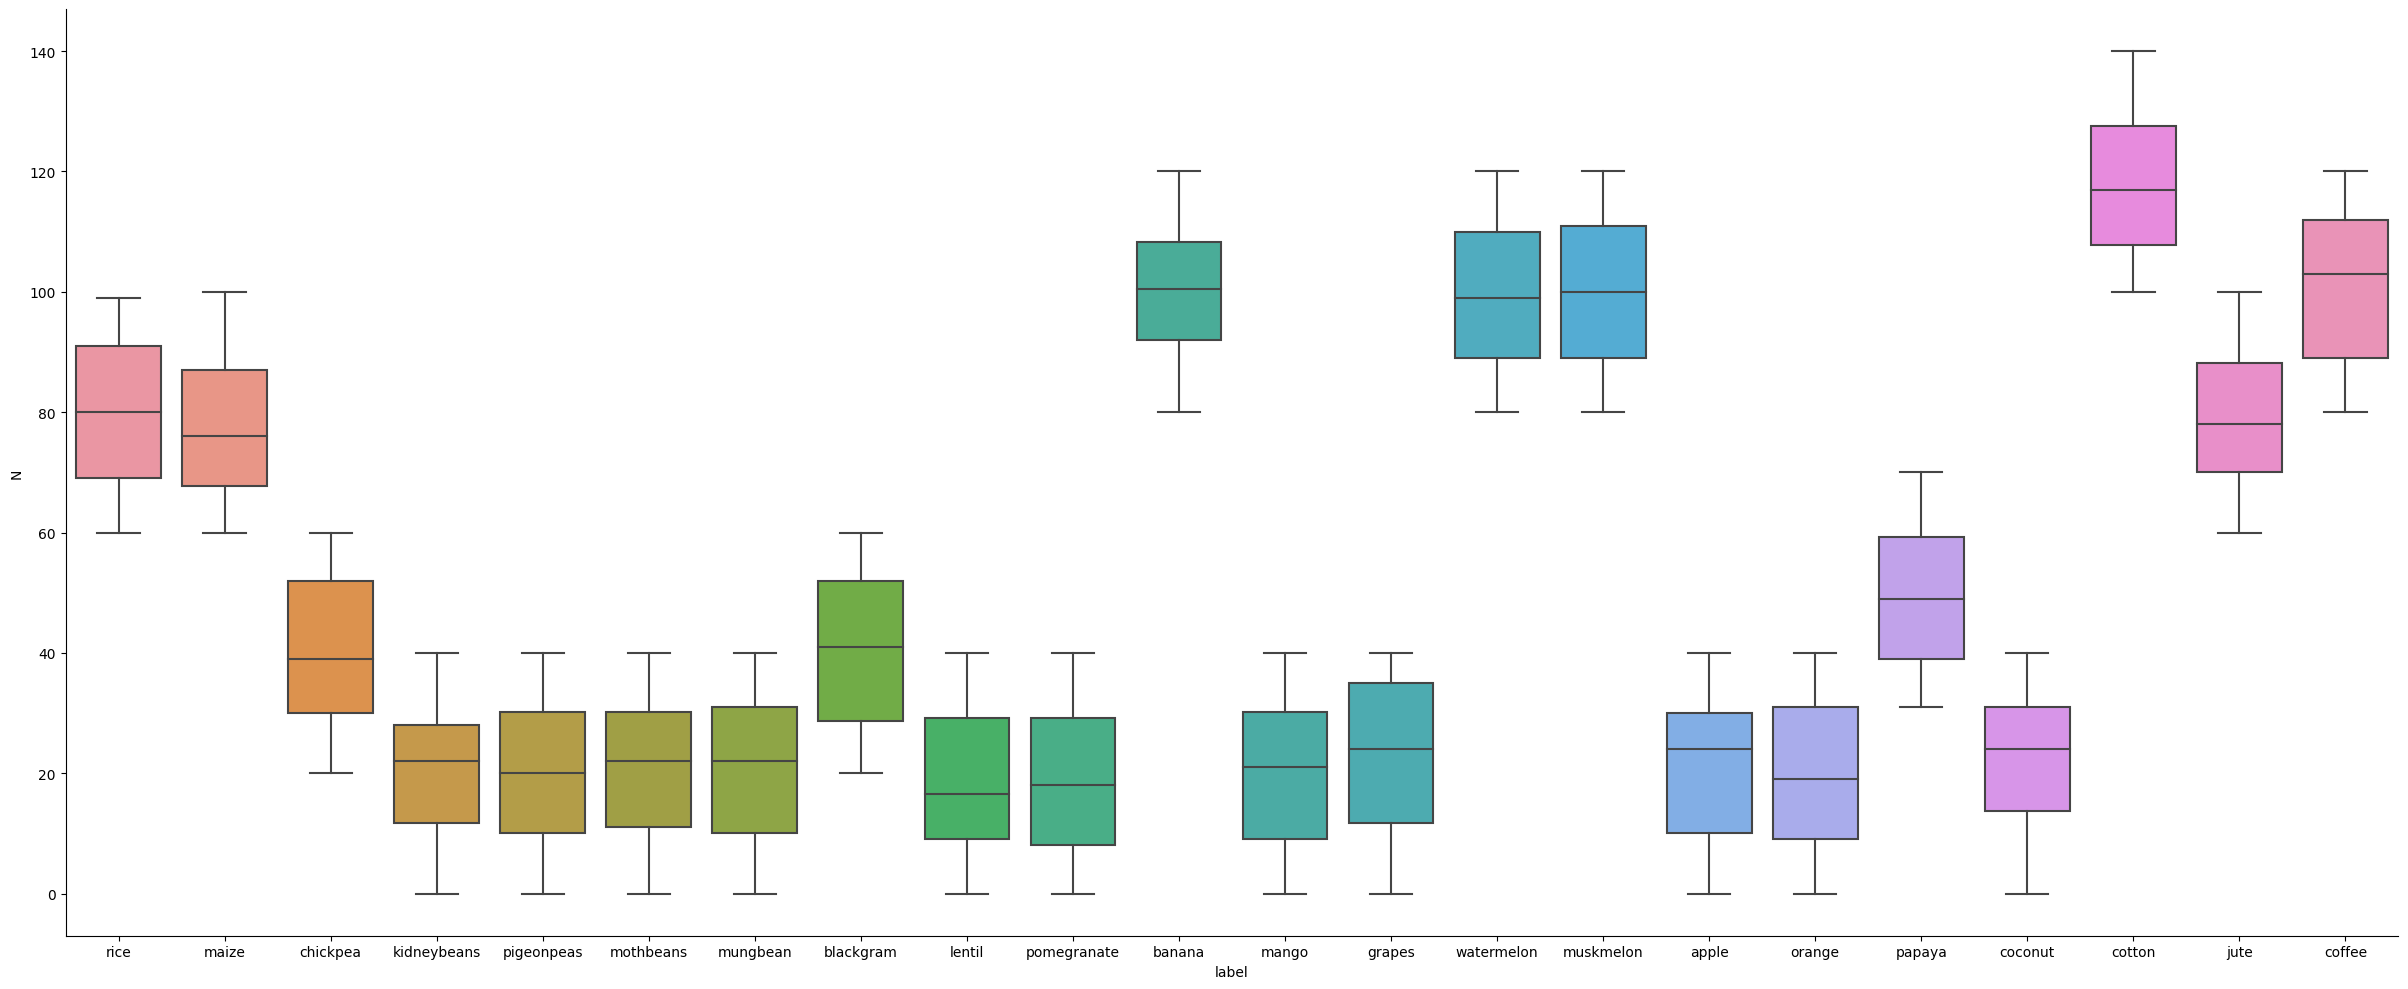

In [22]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
plt.show()

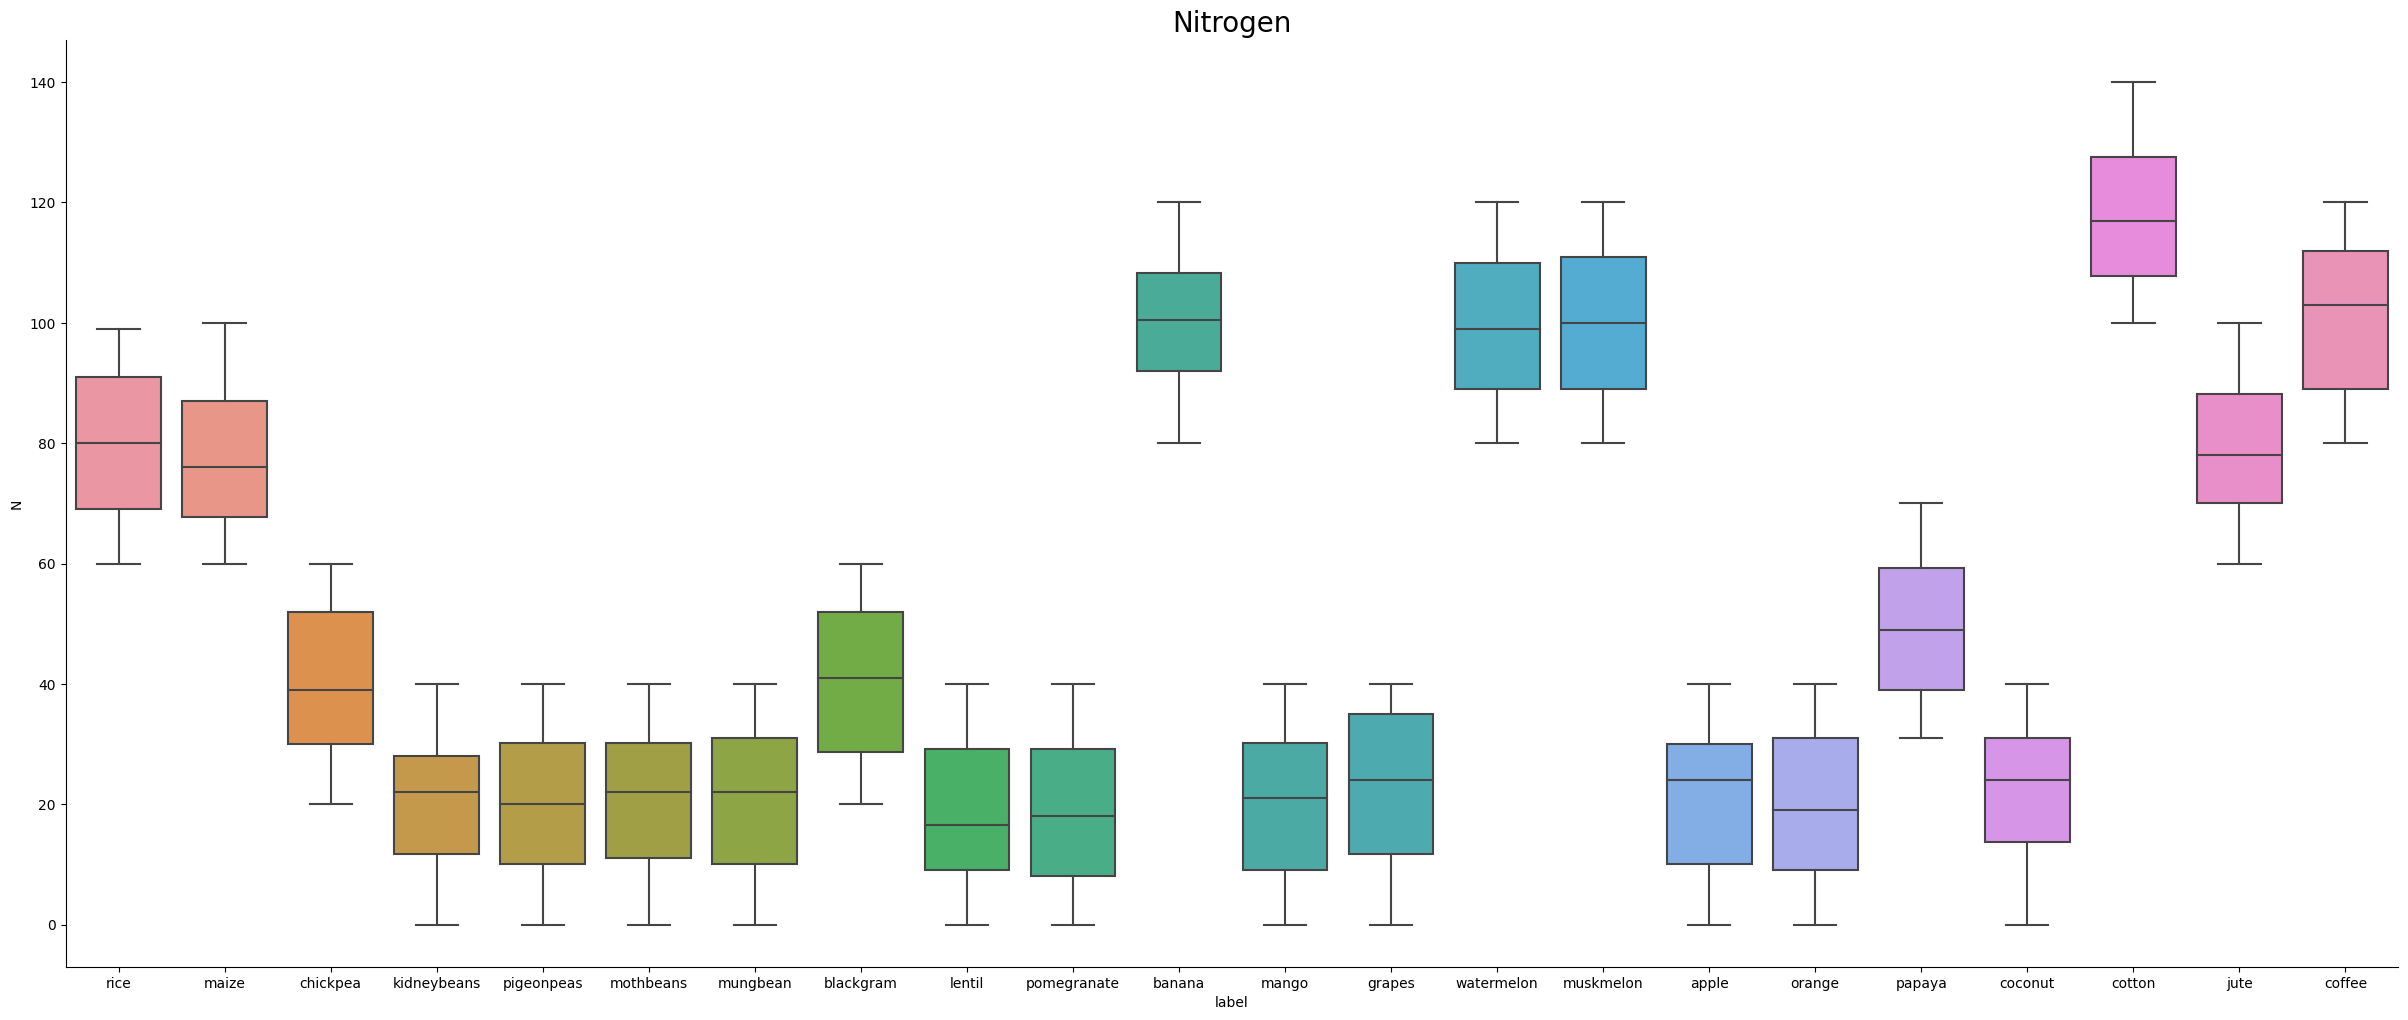

In [23]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
plt.title("Nitrogen",size=20)
plt.show()

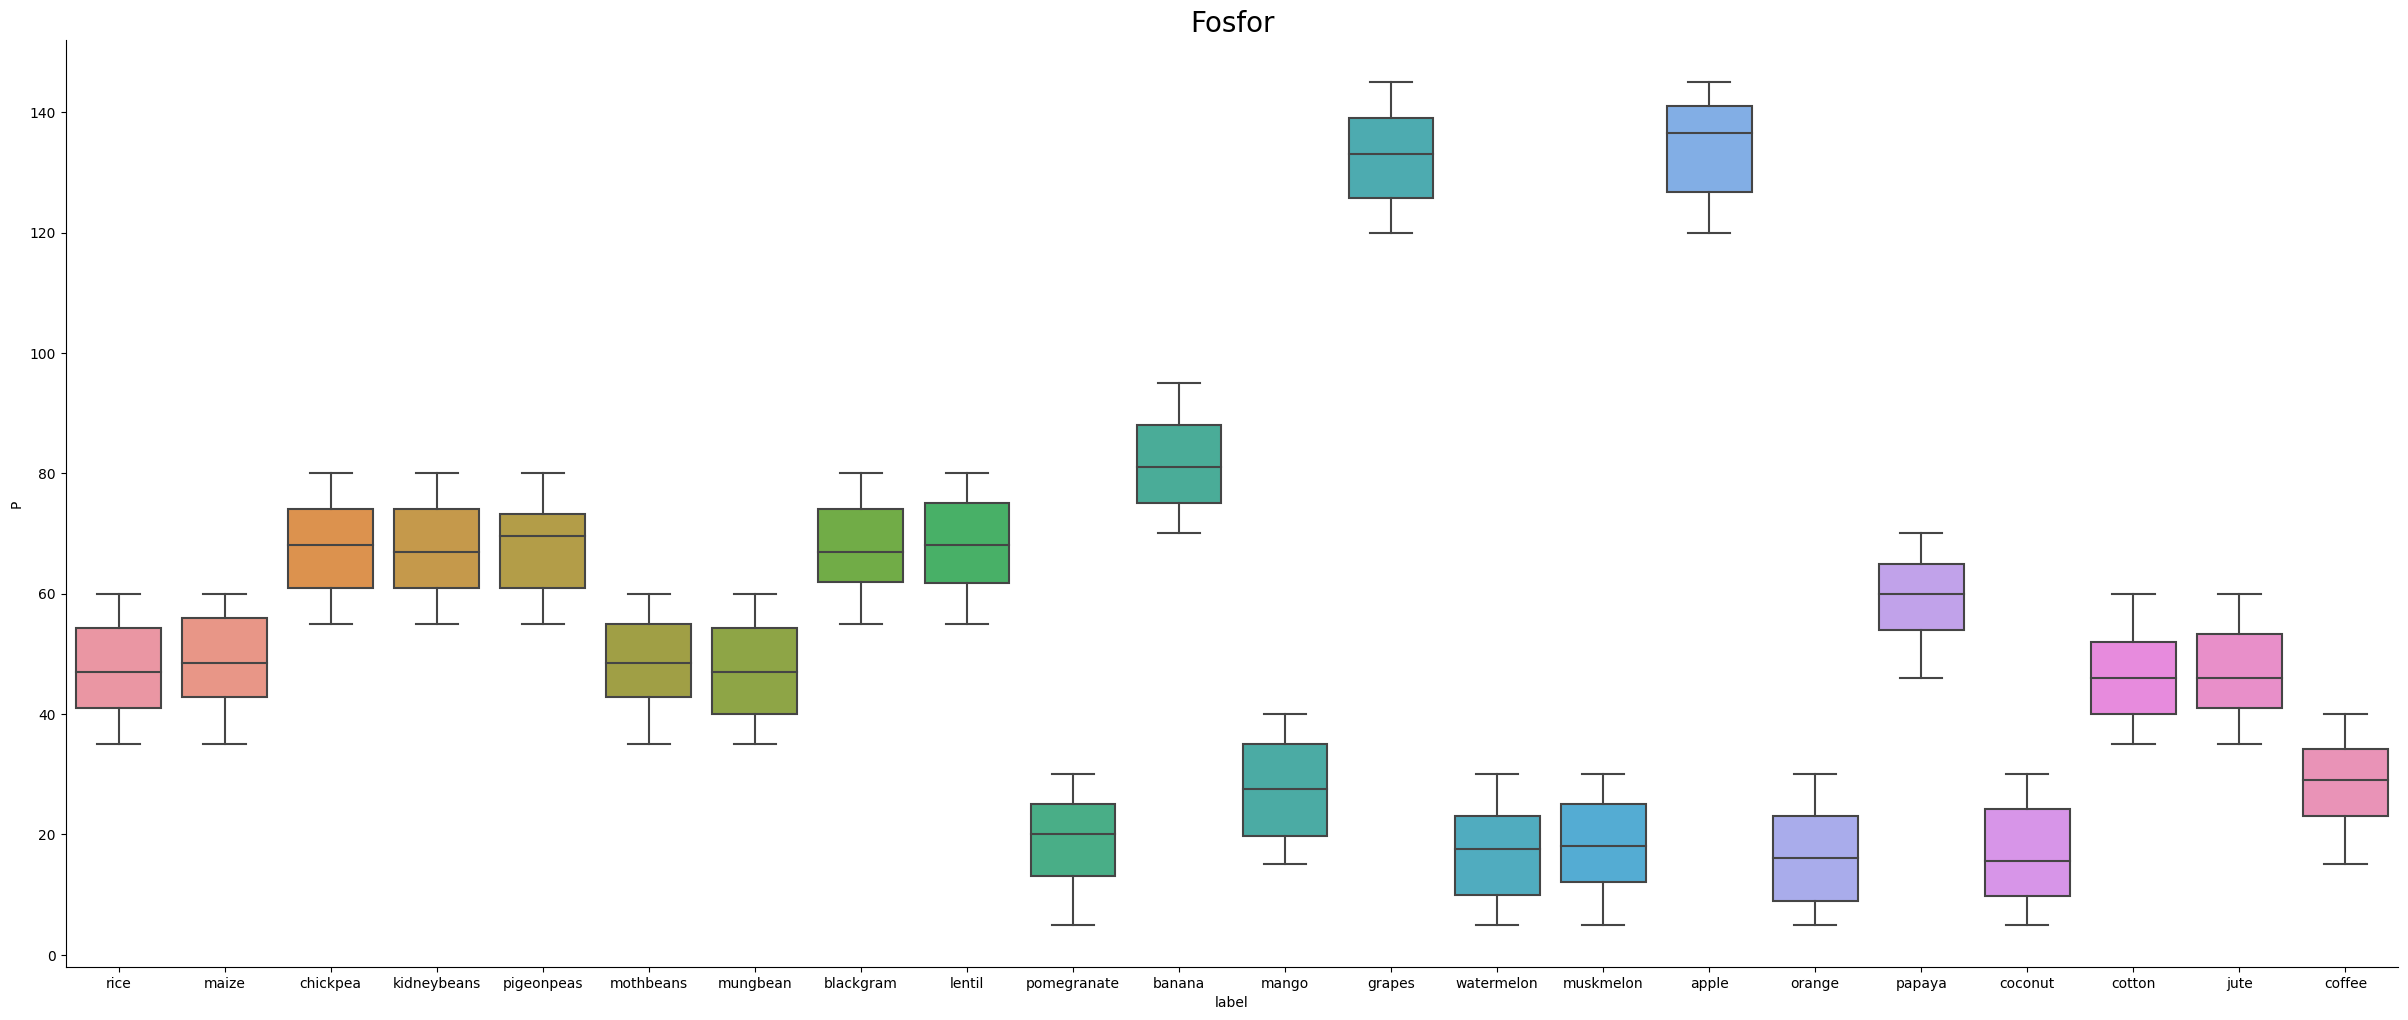

In [206]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
plt.title("Fosfor",size=20)
plt.show()

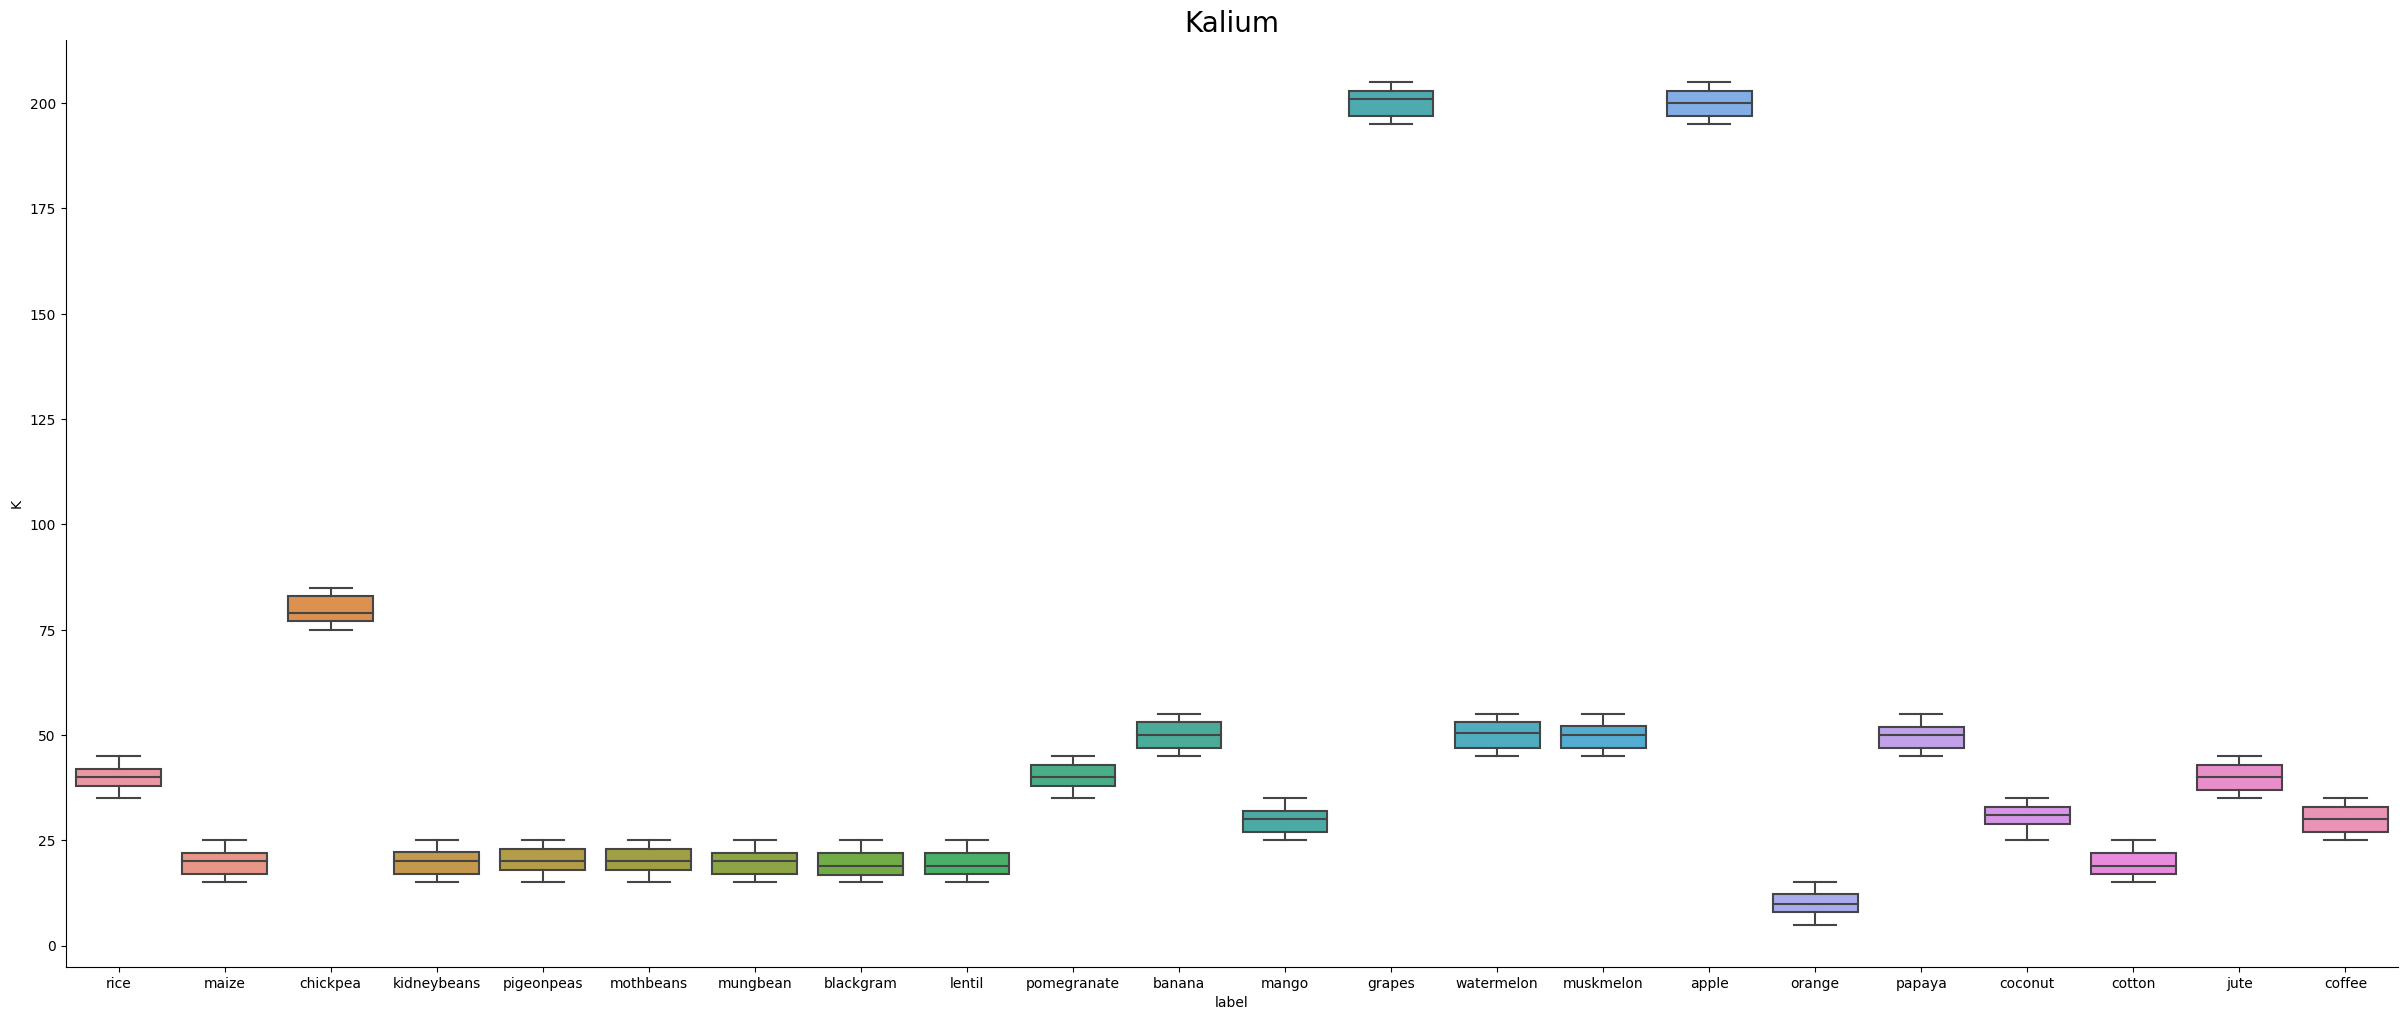

In [205]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
plt.title("Kalium",size=20)
plt.show()

## Grafik ini menunjukkan bahwa tidak ada outlier dalam kumpulan data ini

#### 2.4 Memeriksa Outlier dengan detect outlier dan Statistik Matematika


In [207]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Batasan yang lebih rendah : {lower_limit} Batas atas : {upper_limit}")
    print(f"Nilai Minimal : {x.min()}   Nilai Maksimal: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Batas bawah gagal - Perlu menghapus nilai minimum")
            elif lower_limit < x.min():
                print("Batas bawah terlewati - Tidak perlu menghapus outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Batas atas terlewati - Tidak perlu menghapus outlier")
            elif upper_limit < x.max():
                print("Batas atas gagal - Perlu menghapus nilai maksimum")
detect_outlier(df['K'][df['label']=='maize'])

Batasan yang lebih rendah : 9.5 Batas atas : 29.5
Nilai Minimal : 15   Nilai Maksimal: 25
Batas bawah terlewati - Tidak perlu menghapus outlier
Batas atas terlewati - Tidak perlu menghapus outlier


In [208]:
for i in df['label'].unique():
    detect_outlier(df['N'][df['label']==i])
    print('---------------------------------------------')

Batasan yang lebih rendah : 36.0 Batas atas : 124.0
Nilai Minimal : 60   Nilai Maksimal: 99
Batas bawah terlewati - Tidak perlu menghapus outlier
Batas atas terlewati - Tidak perlu menghapus outlier
---------------------------------------------
Batasan yang lebih rendah : 38.875 Batas atas : 115.875
Nilai Minimal : 60   Nilai Maksimal: 100
Batas bawah terlewati - Tidak perlu menghapus outlier
Batas atas terlewati - Tidak perlu menghapus outlier
---------------------------------------------
Batasan yang lebih rendah : -3.0 Batas atas : 85.0
Nilai Minimal : 20   Nilai Maksimal: 60
Batas bawah terlewati - Tidak perlu menghapus outlier
Batas atas terlewati - Tidak perlu menghapus outlier
---------------------------------------------
Batasan yang lebih rendah : -12.625 Batas atas : 52.375
Nilai Minimal : 0   Nilai Maksimal: 40
Batas bawah terlewati - Tidak perlu menghapus outlier
Batas atas terlewati - Tidak perlu menghapus outlier
---------------------------------------------
Batasan yang 

## Grafik ini menunjukkan bahwa tidak ada outlier dalam kumpulan data ini dan dikonfirmasi dengan bantuan Statistik (IQR)

## KLASIFIKASI
#### Data Training dan Testing
#### 3.1 Membagi data kedalam Data Training dan Data Testing
        1. Skenario 1 : 60%, 40%
        2. Skenario 2 : 70%, 30%
        3. Skenario 3 : 80%, 20%


In [209]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [210]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Panjang Label : ",len(y))

Panjang Label :  2200


In [211]:
from sklearn.model_selection import train_test_split
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
x_train,x_test,y_train,y_test = train_test_split(features,Y,random_state=42,test_size=0.40)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1320 1320 880 880


### 3.2 Pemilihan model terbaik
#### 3.2.1 Naive Bayes, Random Forest

In [212]:
a={'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,15]
        }
    },
   'naive_bayes':{
       'model':GaussianNB(),
       'params':{}
   }
}

In [214]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Nama Model':mdl,
        'Skor Terbaik':res.best_score_,
        'Parameter Terbaik':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Nama Model,Skor Terbaik,Parameter Terbaik
0,random_forest,0.993182,{'randomforestclassifier__n_estimators': 15}
1,naive_bayes,0.995455,{}


In [215]:
details[0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027209,0.003920,0.008002,0.005060,1,{'randomforestclassifier__n_estimators': 1},0.939394,0.928030,0.954545,0.943182,0.931818,0.939394,0.009278,4
1,0.058677,0.014102,0.006402,0.003201,5,{'randomforestclassifier__n_estimators': 5},0.984848,0.965909,0.996212,0.984848,0.984848,0.983333,0.009761,3
2,0.231093,0.099656,0.014403,0.005987,10,{'randomforestclassifier__n_estimators': 10},0.984848,0.992424,1.000000,0.988636,0.988636,0.990909,0.005138,2
3,0.184910,0.082253,0.009604,0.003196,15,{'randomforestclassifier__n_estimators': 15},0.996212,0.984848,1.000000,0.992424,0.992424,0.993182,0.005025,1


In [216]:
details[1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028283,0.01157,0.006399,0.003199,{},0.996212,0.988636,0.996212,1.0,0.996212,0.995455,0.003711,1


In [217]:
score

[{'Nama Model': 'random_forest',
  'Skor Terbaik': 0.9931818181818182,
  'Parameter Terbaik': {'randomforestclassifier__n_estimators': 15}},
 {'Nama Model': 'naive_bayes',
  'Skor Terbaik': 0.9954545454545455,
  'Parameter Terbaik': {}}]

In [218]:
pd.DataFrame(score)

,Nama Model,Skor Terbaik,Parameter Terbaik
0,random_forest,0.993182,{'randomforestclassifier__n_estimators': 15}
1,naive_bayes,0.995455,{}


In [219]:
for i in best_param.keys():
    print(f'{i} : {best_param[i].score(x_test,y_test)}')

random_forest : 0.990909090909091
naive_bayes : 0.9931818181818182


#### 3.2.2 Model Klasifikasi Terbaik - Naive bayes

In [220]:
predicted = best_param['naive_bayes'].predict(x_test)
predicted

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

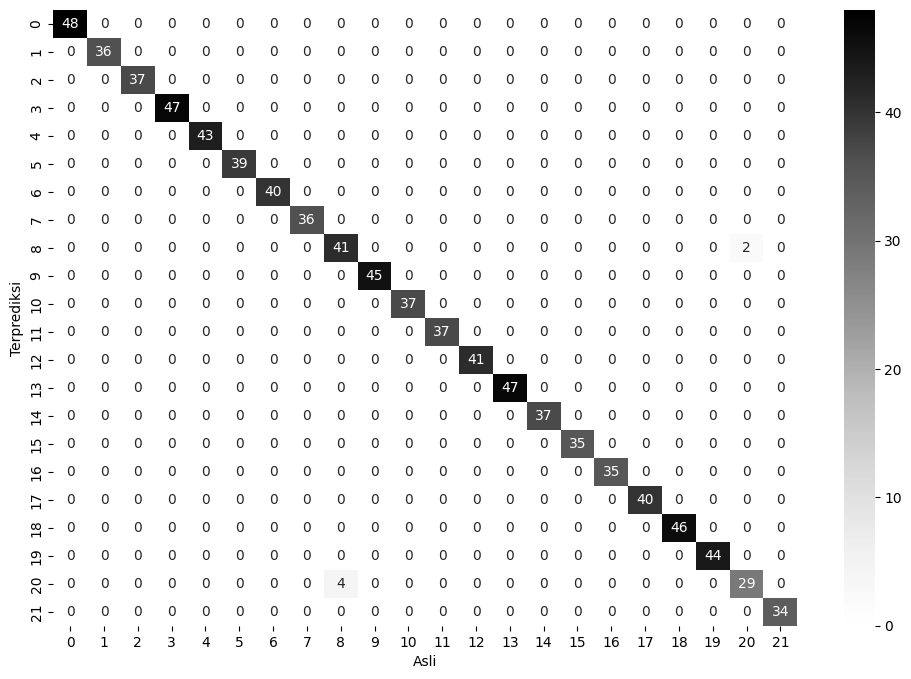

In [222]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True, cmap='Greys')
plt.xlabel("Asli")
plt.ylabel("Terprediksi")
plt.show()

In [223]:
predictedRF = best_param['random_forest'].predict(x_test)
predictedRF

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'mothbeans', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickp

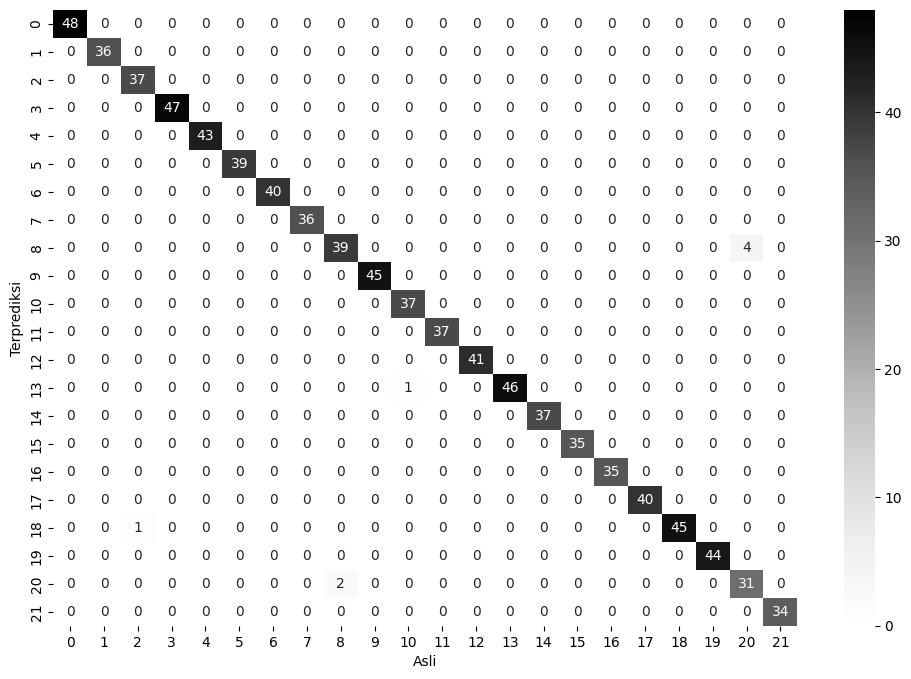

In [224]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictedRF),annot=True, cmap='Greys')
plt.xlabel("Asli")
plt.ylabel("Terprediksi")
plt.show()

## Kesimpulan
### Pemetaan Nilai
#### Pemetaan nilai menunjukkan nilai mana yang termasuk ke dalam tanaman yang mana. Ini membantu dalam membaca nilai yang diprediksi dengan mudah. Misalnya, jika nilai yang diprediksi adalah 20, maka nilainya termasuk ke dalam tanaman padi. Dan seterusnya...

In [225]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [227]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['Tanaman']=code
refer['Kode']=encode
refer

,Tanaman,Kode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


## 4.2 Report
### Disini merupakan Hasil Presisi, Akurasi, Recalll, F-1 Score dan Support

In [228]:
x = metrics.accuracy_score(y_test, predicted)
print("Naive Bayes's Accuracy adalah: ", x)
print(classification_report(y_test,predicted))

Naive Bayes's Accuracy adalah:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        48
      banana       1.00      1.00      1.00        36
   blackgram       1.00      1.00      1.00        37
    chickpea       1.00      1.00      1.00        47
     coconut       1.00      1.00      1.00        43
      coffee       1.00      1.00      1.00        39
      cotton       1.00      1.00      1.00        40
      grapes       1.00      1.00      1.00        36
        jute       0.91      0.95      0.93        43
 kidneybeans       1.00      1.00      1.00        45
      lentil       1.00      1.00      1.00        37
       maize       1.00      1.00      1.00        37
       mango       1.00      1.00      1.00        41
   mothbeans       1.00      1.00      1.00        47
    mungbean       1.00      1.00      1.00        37
   muskmelon       1.00      1.00      1.00        35
      orange       1.00      1

In [229]:
x = metrics.accuracy_score(y_test, predictedRF)
print("Random Forest's Accuracy adalah: ", x)
print(classification_report(y_test,predictedRF))

Random Forest's Accuracy adalah:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        48
      banana       1.00      1.00      1.00        36
   blackgram       0.97      1.00      0.99        37
    chickpea       1.00      1.00      1.00        47
     coconut       1.00      1.00      1.00        43
      coffee       1.00      1.00      1.00        39
      cotton       1.00      1.00      1.00        40
      grapes       1.00      1.00      1.00        36
        jute       0.95      0.91      0.93        43
 kidneybeans       1.00      1.00      1.00        45
      lentil       0.97      1.00      0.99        37
       maize       1.00      1.00      1.00        37
       mango       1.00      1.00      1.00        41
   mothbeans       1.00      0.98      0.99        47
    mungbean       1.00      1.00      1.00        37
   muskmelon       1.00      1.00      1.00        35
      orange       1.00      

In [230]:
df.sample()

,N,P,K,temperature,humidity,ph,rainfall,label
703,42,73,25,34.036792,67.211138,6.501869,73.235736,blackgram


#### Mencoba untuk melakukan prediksi, apakah benar masuk kedalam tanaman yang cocok berdasarkan tanah dengan model yang digunakan apa tidak

In [231]:
data = np.array([[39, 127, 202, 15, 81.6, 6.4, 71.6]])
gnb.fit(x_train.values,y_train)
prediction = gnb.predict(data)
print(prediction)

['grapes']
